In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
    4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6e-19, # Mode effect of the phonons (J)
    2.1e18, # intrinsic semiconductor's density (cm^-3)
    0, # Doping states' density (cm^-3)
    0.1 * 1.6e-19, # Energy to a vacant target site (J)
    -5e4, # Field (V.cm^-1)
    1e13, # Base electron jump rate
    -10, # Fermi level (J)
    2.7, # Intrinsic semiconductor's gaussian width (J)
    2.7, # Doping states' gaussian width (J)
    2.7, # Amount of disorder
    150e-7
    );

    T = 300;

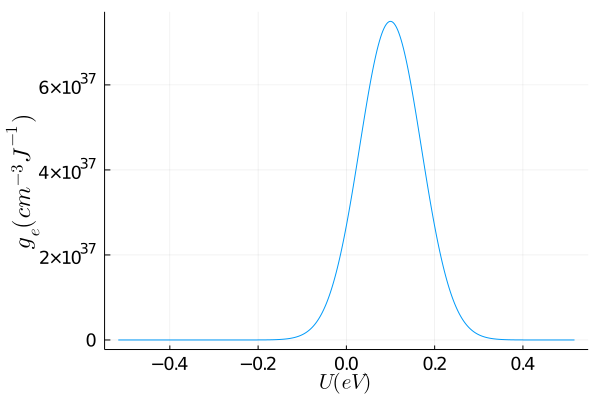

In [2]:
range = -20:0.1:20;

res = (x -> Conduction.DOS(semiconductor, x, T)).(range);
range = range .* ((Conduction.k * T) / (1.602e-19));
plot(range, res, xlabel=L"U (eV)", ylabel=L"g_e (cm^{-3}J^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

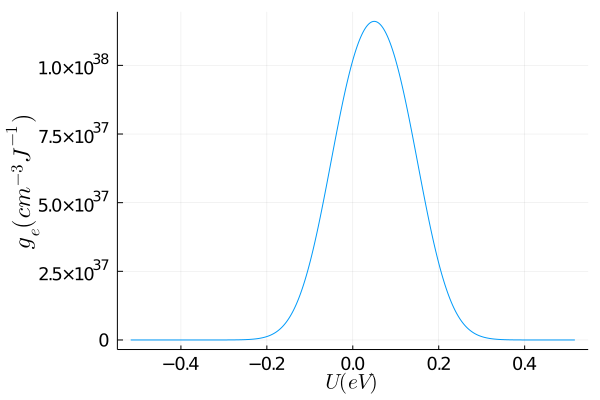

In [3]:
semiconductor.Nd = 2.1e18;

range = -20:0.1:20;

res = (x -> Conduction.DOS(semiconductor, x, T)).(range);
range = range .* ((Conduction.k * T) / (1.602e-19));
plot(range, res, xlabel=L"U (eV)", ylabel=L"g_e (cm^{-3}J^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

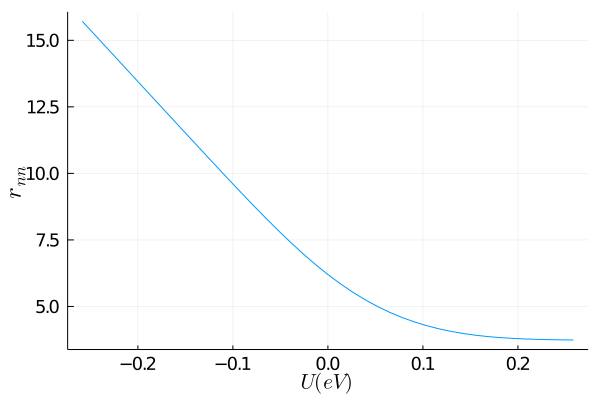

In [4]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

T = 300;

range = -10:0.5:10;
res = (x -> Conduction.RnnVRH(semiconductor, x, T)).(range)

range = range .* ((Conduction.k * T) / (1.602e-19));
plot(range, res, xlabel=L"U (eV)", ylabel=L"r_{nn}", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [5]:
range = -15:0.5:15;

res = (x -> Conduction.xf(semiconductor, Conduction.RnnVRH, x, T)).(range)

61-element Array{Float64,1}:
 0.1252580595596492
 0.12525803931157375
 0.12525803599626376
 0.12525804168051777
 0.12525805322067582
 0.1252580356468167
 0.12525800164274611
 0.12525789593588954
 0.12525766952582118
 0.12525712467293598
 0.12525585649894602
 0.1252529767818881
 0.1252466815122327
 ⋮
 0.0008854973271176165
 0.0005759273571597559
 0.00036332368708844195
 0.0002221669948769938
 0.00013161501964538335
 7.551399640299178e-5
 4.195071859880789e-5
 2.2561795791010928e-5
 1.1745845517817753e-5
 5.918883707965224e-6
 2.886808398567172e-6
 1.3627064849320574e-6

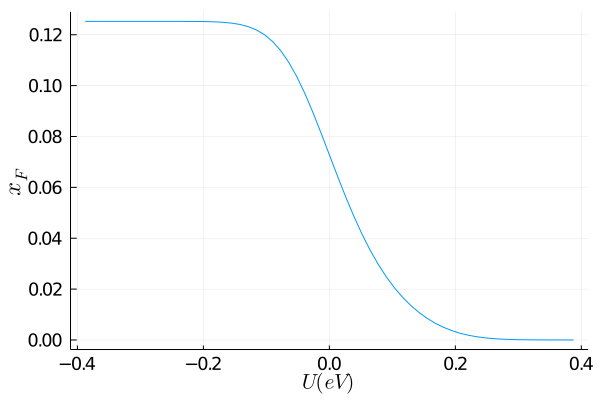

In [8]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res,  xlabel=L"U (eV)", ylabel=L"x_F", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [10]:
function I1(x)
    R = Conduction.RnnVRH(semiconductor, x, T);
    return Conduction.I1(x, T, semiconductor, R)
end

res = I1.(range);

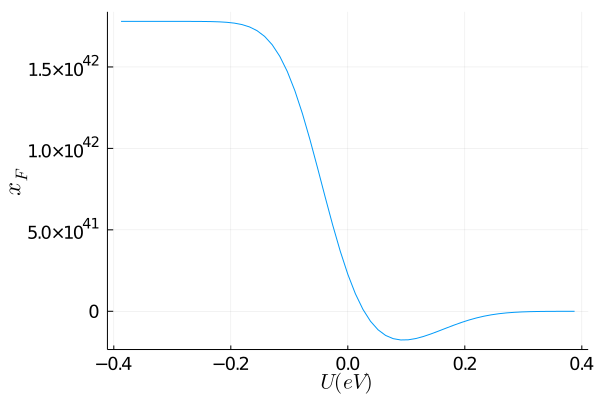

In [11]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res,  xlabel=L"U (eV)", ylabel=L"I_1", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [12]:
function I2(x)
    R = Conduction.RnnVRH(semiconductor, x, T);
    return Conduction.I2(x, T, semiconductor, R)
end

res = I2.(range);

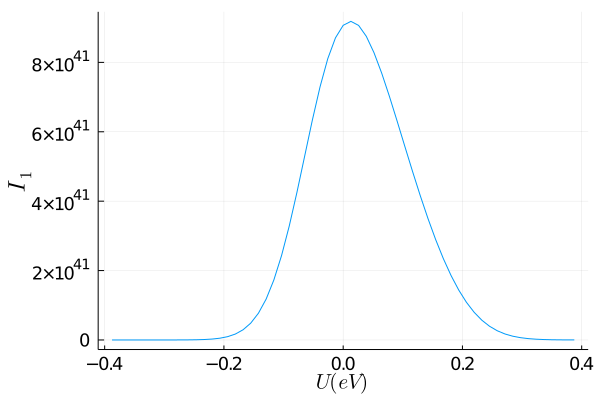

In [13]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res,  xlabel=L"U (eV)", ylabel=L"I_1", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


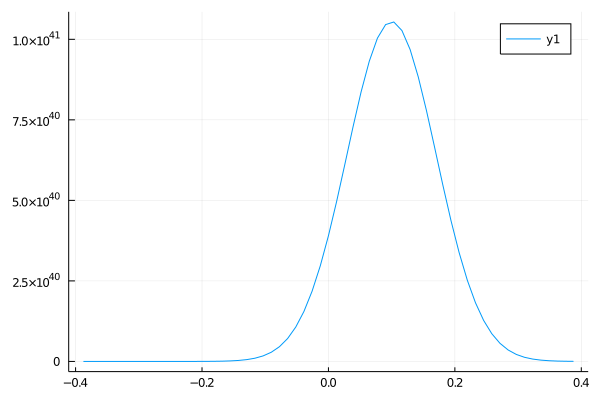

In [16]:
plot(range  .* ((Conduction.k * T) / (1.602e-19)), (x -> Conduction.DOS(semiconductor, x, T)).(range))

In [17]:
I1(-15)

1.7798196782933194e42

In [ ]:
Conduction.RnnVRH(semiconductor, -15, T);